<a href="https://colab.research.google.com/github/SAILAXMIPANDULA/comparison-between-chatgpt-and-gemini/blob/main/chatgpt_gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
EXPLORING MENTAL HEALTH USING LLMs:Comparison between ChatGPT and Gemini

In [ ]:
#installing datasets
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


# 1. Data Collection


In [ ]:
 # Loading dataset

import pandas as pd

from datasets import load_dataset

mentalhealth_dataset = load_dataset("alexandreteles/mental-health-conversational-data")

mentalhealth_dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/661 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Context', 'Knowledge', 'Response'],
        num_rows: 661
    })
})

In [ ]:
#reading dataset using pandas

df=pd.DataFrame(mentalhealth_dataset['train'])
df

Context Knowledge  \
0                                                   Hi  greeting   
1                                                   Hi  greeting   
2                                                   Hi  greeting   
3                                                   Hi  greeting   
4                                                   Hi  greeting   
..                                                 ...       ...   
656                       How do I know if I'm unwell?   fact-29   
657  How can I maintain social connections? What if...   fact-30   
658  What's the difference between anxiety and stress?   fact-31   
659  What's the difference between sadness and depr...   fact-32   
660          difference between sadness and depression   fact-32   

                                              Response  
0      Hello there. Tell me how are you feeling today?  
1                Hi there. What brings you here today?  
2                 Hi there. How are you feeling today?  
3         Great to see you. How do you feel currently?  
4    Hello there. Glad to see you're back. What's g...  
..                                                 ...  
656  If your beliefs , thoughts , feelings or behav...  
657  A lot of people are alone right now, but we do...  
658  Stress and anxiety are often used interchangea...  
659  Sadness is a normal reaction to a loss, disapp...  
660  Sadness is a normal reaction to a loss, disapp...  

[661 rows x 3 columns]

In [ ]:
# downloading dataset as csv

df.to_csv("mental_health_conversational_data.csv", index=False)
df

Context Knowledge  \
0                                                   Hi  greeting   
1                                                   Hi  greeting   
2                                                   Hi  greeting   
3                                                   Hi  greeting   
4                                                   Hi  greeting   
..                                                 ...       ...   
656                       How do I know if I'm unwell?   fact-29   
657  How can I maintain social connections? What if...   fact-30   
658  What's the difference between anxiety and stress?   fact-31   
659  What's the difference between sadness and depr...   fact-32   
660          difference between sadness and depression   fact-32   

                                              Response  
0      Hello there. Tell me how are you feeling today?  
1                Hi there. What brings you here today?  
2                 Hi there. How are you feeling today?  
3         Great to see you. How do you feel currently?  
4    Hello there. Glad to see you're back. What's g...  
..                                                 ...  
656  If your beliefs , thoughts , feelings or behav...  
657  A lot of people are alone right now, but we do...  
658  Stress and anxiety are often used interchangea...  
659  Sadness is a normal reaction to a loss, disapp...  
660  Sadness is a normal reaction to a loss, disapp...  

[661 rows x 3 columns]

In [ ]:
#checking rows and columns of dataset
df.shape

(661, 3)

# 2. Data Processing

In [ ]:
# checking for null values

df.isnull().sum()


Context      0
Knowledge    0
Response     0
dtype: int64

In [ ]:
# Removed empty strings and none values
df.replace("",None,inplace=True)
df.dropna(subset=['Context','Response'],inplace=True)
df

Context Knowledge  \
0                                                   Hi  greeting   
1                                                   Hi  greeting   
2                                                   Hi  greeting   
3                                                   Hi  greeting   
4                                                   Hi  greeting   
..                                                 ...       ...   
656                       How do I know if I'm unwell?   fact-29   
657  How can I maintain social connections? What if...   fact-30   
658  What's the difference between anxiety and stress?   fact-31   
659  What's the difference between sadness and depr...   fact-32   
660          difference between sadness and depression   fact-32   

                                              Response  
0      Hello there. Tell me how are you feeling today?  
1                Hi there. What brings you here today?  
2                 Hi there. How are you feeling today?  
3         Great to see you. How do you feel currently?  
4    Hello there. Glad to see you're back. What's g...  
..                                                 ...  
656  If your beliefs , thoughts , feelings or behav...  
657  A lot of people are alone right now, but we do...  
658  Stress and anxiety are often used interchangea...  
659  Sadness is a normal reaction to a loss, disapp...  
660  Sadness is a normal reaction to a loss, disapp...  

[657 rows x 3 columns]

# 3. Exploratory Data Analysis

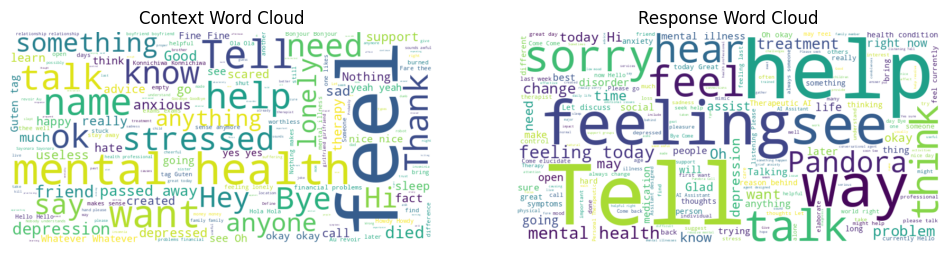

In [ ]:
#checking for most frequent words in both contexts and responses
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset file


# Join all contexts and responses into single strings
all_contexts = ' '.join(df['Context'].dropna())
all_responses = ' '.join(df['Response'].dropna())

# Create word clouds for contexts and responses
context_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_contexts)
response_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_responses)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(context_wordcloud, interpolation='bilinear')
plt.title('Context Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(response_wordcloud, interpolation='bilinear')
plt.title('Response Word Cloud')
plt.axis('off')

plt.show()


In [ ]:
# value count  for knowledge column

knowledge_count = df['Knowledge'].value_counts()
knowledge_count

Knowledge
casual              66
greeting            60
about               48
default             40
goodbye             32
                    ..
neutral-response     1
skill                1
pandora-useful       1
morning              1
fact-11              1
Name: count, Length: 79, dtype: int64

In [ ]:
# knowledge_count gretaer than 20

knowledge_count[knowledge_count > 20]

Knowledge
casual      66
greeting    60
about       48
default     40
goodbye     32
sad         32
done        25
help        21
happy       21
Name: count, dtype: int64

# 4. ChatGPT Response Generation

In [ ]:
#installing openai
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [ ]:
#checking response for one context
import os

from openai import OpenAI

client = OpenAI(
    # This is the default and can be omitted
    api_key="sk",
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "What's the difference between anxiety and stress?",
        }
    ],
    model="gpt-3.5-turbo",
)

In [ ]:
chat_completion

ChatCompletion(id='chatcmpl-9G832Ui44TDYRQVe45kTaPiWbJL5W', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Anxiety is a feeling of worry, fear, or unease about a future event or outcome. It is typically a response to something perceived as threatening or potentially harmful. Stress, on the other hand, is a physical or emotional response to external pressures or demands. It can be caused by a variety of factors, such as work, relationships, or financial issues. While anxiety is a specific feeling of fear or worry, stress is a more general feeling of being overwhelmed or unable to cope with a situation.', role='assistant', function_call=None, tool_calls=None))], created=1713631212, model='gpt-3.5-turbo-0125', object='chat.completion', system_fingerprint='fp_c2295e73ad', usage=CompletionUsage(completion_tokens=101, prompt_tokens=16, total_tokens=117))

In [ ]:
# using gpt-3.5-turbo generating chatgpt response for each context

# Create a new OpenAI client instance
client = OpenAI(api_key="sk")

# Initialize an empty list to store the chat responses
chatgpt_responses = []

# Loop through each context in the random_responses list
for context in df['Response']:
    # Create a chat completion request with the current context as the user's message
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": context,
            }
        ],
        model="gpt-3.5-turbo",
    )

    # Extract the chat response from the chat completion
    chatgpt_response = chat_completion.choices[0].message.content

    # Append the chat response to the chat_responses list
    chatgpt_responses.append(chatgpt_response)

# Print the chat responses
for chatgpt_response in chatgpt_responses:
    print(chatgpt_response)


Hello! I'm just a computer program so I don't have feelings, but I'm here and ready to assist you. How can I help you today?
Hello! I'm here to assist you with any questions you may have or help you with anything you need. How can I help you today?
Hello! I'm just a computer program, so I don't have feelings like humans do. I'm here to assist you with any questions or tasks you have. How can I help you today?
As an AI, I don't have feelings or emotions. But I'm here and ready to assist you with any questions or tasks you might have. How can I help you today?
Hello! I'm here and ready to chat. Right now, I'm just hanging out and waiting for your questions. What's going on in your world?
Hello! I'm just a computer program, so I don't have feelings in the same way that humans do. But I'm here and ready to help you with anything you need. How can I assist you today?
Hello! I'm an AI assistant here to provide help and answer any questions you may have. How can I assist you today?
Hello! I'm

In [ ]:
print(len(chatgpt_responses))



657


# 5. Converting original Responses to Embeddings

In [ ]:


# Convert 'original responses' to a list of strings
standard_response_list = df['Response'].tolist()

print(standard_response_list)


['Hello there. Tell me how are you feeling today?', 'Hi there. What brings you here today?', 'Hi there. How are you feeling today?', 'Great to see you. How do you feel currently?', "Hello there. Glad to see you're back. What's going on in your world right now?", 'Hello there. Tell me how are you feeling today?', 'Hi there. What brings you here today?', 'Hi there. How are you feeling today?', 'Great to see you. How do you feel currently?', "Hello there. Glad to see you're back. What's going on in your world right now?", 'Hello there. Tell me how are you feeling today?', 'Hi there. What brings you here today?', 'Hi there. How are you feeling today?', 'Great to see you. How do you feel currently?', "Hello there. Glad to see you're back. What's going on in your world right now?", 'Hello there. Tell me how are you feeling today?', 'Hi there. What brings you here today?', 'Hi there. How are you feeling today?', 'Great to see you. How do you feel currently?', "Hello there. Glad to see you're 

In [ ]:
# converting original responses to embeddings using bert
import transformers
import torch
# Load the BERT tokenizer and model
tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-uncased")
model = transformers.AutoModel.from_pretrained("bert-base-uncased")

# Encode the text in the responses using BERT
standard_encoded_responses = tokenizer(standard_response_list, padding=True, truncation=True, return_tensors="pt")

# Get the BERT embeddings for the encoded text
with torch.no_grad():
    model_output = model(**standard_encoded_responses)
    standard_embeddings = model_output.pooler_output

# Print the shape of the embeddings
print(standard_embeddings)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tensor([[-0.9050, -0.3170, -0.7775,  ..., -0.5701, -0.6867,  0.8886],
        [-0.9451, -0.4878, -0.9316,  ..., -0.8420, -0.7578,  0.9403],
        [-0.9454, -0.4603, -0.9175,  ..., -0.7808, -0.7406,  0.9266],
        ...,
        [-0.6793, -0.5712, -0.9712,  ..., -0.9615, -0.4867,  0.3869],
        [-0.6200, -0.6038, -0.9815,  ..., -0.9313, -0.6690,  0.3167],
        [-0.6200, -0.6038, -0.9815,  ..., -0.9313, -0.6690,  0.3167]])


# 6. Converting ChatGPT Responses to Embeddings

In [ ]:
# adding chatgpt_responses to dataframe

df['chatgpt_responses'] = chatgpt_responses
df


Context Knowledge  \
0                                                   Hi  greeting   
1                                                   Hi  greeting   
2                                                   Hi  greeting   
3                                                   Hi  greeting   
4                                                   Hi  greeting   
..                                                 ...       ...   
656                       How do I know if I'm unwell?   fact-29   
657  How can I maintain social connections? What if...   fact-30   
658  What's the difference between anxiety and stress?   fact-31   
659  What's the difference between sadness and depr...   fact-32   
660          difference between sadness and depression   fact-32   

                                              Response  \
0      Hello there. Tell me how are you feeling today?   
1                Hi there. What brings you here today?   
2                 Hi there. How are you feeling today?   
3         Great to see you. How do you feel currently?   
4    Hello there. Glad to see you're back. What's g...   
..                                                 ...   
656  If your beliefs , thoughts , feelings or behav...   
657  A lot of people are alone right now, but we do...   
658  Stress and anxiety are often used interchangea...   
659  Sadness is a normal reaction to a loss, disapp...   
660  Sadness is a normal reaction to a loss, disapp...   

                                     chatgpt_responses  
0    Hello! I'm just a computer program so I don't ...  
1    Hello! I'm here to assist you with any questio...  
2    Hello! I'm just a computer program, so I don't...  
3    As an AI, I don't have feelings or emotions. B...  
4    Hello! I'm here and ready to chat. Right now, ...  
..                                                 ...  
656  This could indicate that you are struggling wi...  
657   Remember that it's okay to feel lonely at tim...  
658  \n\nChronic stress can lead to physical health...  
659  \n\nThere are many ways to help manage and tre...  
660  Depression is not a sign of weakness or someth...  

[657 rows x 4 columns]

In [ ]:

# Convert 'chatgpt_responses' to a list of strings

chatgpt_responses_list = df['chatgpt_responses'].tolist()

print(chatgpt_responses_list)

["Hello! I'm just a computer program so I don't have feelings, but I'm here and ready to assist you. How can I help you today?", "Hello! I'm here to assist you with any questions you may have or help you with anything you need. How can I help you today?", "Hello! I'm just a computer program, so I don't have feelings like humans do. I'm here to assist you with any questions or tasks you have. How can I help you today?", "As an AI, I don't have feelings or emotions. But I'm here and ready to assist you with any questions or tasks you might have. How can I help you today?", "Hello! I'm here and ready to chat. Right now, I'm just hanging out and waiting for your questions. What's going on in your world?", "Hello! I'm just a computer program, so I don't have feelings in the same way that humans do. But I'm here and ready to help you with anything you need. How can I assist you today?", "Hello! I'm an AI assistant here to provide help and answer any questions you may have. How can I assist y

In [ ]:
# chatgpt responses embedding using bert

# Import the necessary libraries
import transformers
import torch
# Load the BERT tokenizer and model
tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-uncased")
model = transformers.AutoModel.from_pretrained("bert-base-uncased")

# Encode the text in the responses using BERT
chatgpt_encoded_responses = tokenizer(chatgpt_responses_list, padding=True, truncation=True, return_tensors="pt")

# Get the BERT embeddings for the encoded text
with torch.no_grad():
    model_output = model(**chatgpt_encoded_responses)
    chatgpt_embeddings = model_output.pooler_output

# Print the shape of the embeddings
print(chatgpt_embeddings)


tensor([[-0.9325, -0.5729, -0.9770,  ..., -0.9012, -0.8243,  0.9313],
        [-0.9395, -0.5956, -0.9817,  ..., -0.9313, -0.8438,  0.9276],
        [-0.9352, -0.5816, -0.9873,  ..., -0.9507, -0.8229,  0.9342],
        ...,
        [-0.8952, -0.7333, -0.9807,  ..., -0.9608, -0.8024,  0.5599],
        [-0.8853, -0.7111, -0.9924,  ..., -0.9577, -0.8158,  0.5818],
        [-0.8858, -0.6367, -0.9940,  ..., -0.9273, -0.7590,  0.6535]])


# 7. Cosine Similarity score between Original responses and Chatgpt responses

In [ ]:
## finding similarity score between standard responses and chatgpt_responses

from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between the two sets of embeddings
cosine_similarity_scores_1 = cosine_similarity(standard_embeddings, chatgpt_embeddings)

# Print the cosine similarity scores
print(cosine_similarity_scores_1)


[[0.95895934 0.95076203 0.9499899  ... 0.8611215  0.87668955 0.9094288 ]
 [0.9878885  0.98200774 0.9800472  ... 0.89887404 0.9164524  0.9467895 ]
 [0.9838684  0.97784734 0.97573936 ... 0.89491105 0.9122174  0.942554  ]
 ...
 [0.81974566 0.83403146 0.84024763 ... 0.9466718  0.9309156  0.8962947 ]
 [0.8324841  0.84710515 0.85193133 ... 0.95353323 0.9434675  0.9091039 ]
 [0.8324841  0.84710497 0.85193133 ... 0.95353323 0.9434675  0.9091039 ]]


In [ ]:
#calculating overall (average) similarity for standard and chatgpt responses
mean_cosine_similarity_1 = cosine_similarity_scores_1.mean().item()
mean_cosine_similarity_1

0.9343438744544983

The Cosine similarity score between original responses and ChatGPT response is 93 % which is good.

# 8. Gemini Response Generation

In [ ]:
#installing generative AI
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.8/146.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.5/664.5 kB 23.2 MB/s eta 0:00:00


In [ ]:
#configuring gemini api key
import google. generativeai as genai
API_Key= 'AI'
genai.configure(api_key=API_Key)

In [ ]:
 #safety settings for excluding harm content
safety_settings = [
    {
        "category": "HARM_CATEGORY_DANGEROUS",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_HARASSMENT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_HATE_SPEECH",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
        "threshold": "BLOCK_NONE",
    },
]
#checking response for single context
context = "Hi"
model = genai.GenerativeModel('gemini-pro')
generated_response = model.generate_content(context, safety_settings=safety_settings).text
print(generated_response)



Hello there. How can I assist you today?


In [ ]:
# generating gemini responses using gemini-pro
generated_responses = []
for context in df['Context']:
    # Check if the context is not empty
    if context.strip():
        response = model.generate_content(context, safety_settings=safety_settings)
        generated_responses.append(response)
    else:
        continue
        # generated_responses.append("Empty context")
df['generated_response'] = generated_responses


In [ ]:
df['generated_response']


0      response:\nGenerateContentResponse(\n    done=...
1      response:\nGenerateContentResponse(\n    done=...
2      response:\nGenerateContentResponse(\n    done=...
3      response:\nGenerateContentResponse(\n    done=...
4      response:\nGenerateContentResponse(\n    done=...
                             ...                        
656    response:\nGenerateContentResponse(\n    done=...
657    response:\nGenerateContentResponse(\n    done=...
658    response:\nGenerateContentResponse(\n    done=...
659    response:\nGenerateContentResponse(\n    done=...
660    response:\nGenerateContentResponse(\n    done=...
Name: generated_response, Length: 657, dtype: object

In [ ]:
#looping all the responses from gemini
for each in generated_responses:
  print(each)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': 'Hi there! How can I assist you today?'}], 'role': 'model'}, 'finish_reason': 1, 'index': 0, 'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}], 'token_count': 0, 'grounding_attributions': []}]}),
)
response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': 'Hello there! How can I assist you today?'}], 'role': 'model'}, 'finish_reason': 1, 'index': 0, 'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1,

In [ ]:
#gemini responses have candidate keys so handling them
gemini_responses = []
for candidate in generated_responses:
    try:
        gemini_responses.append(candidate.text)
    except:
        # print("booo yeah",candidate)
        gemini_responses.append("No response found")


In [ ]:
gemini_responses

['Hi there! How can I assist you today?',
 'Hello there! How can I assist you today?',
 'Hi there!  How can I assist you today?',
 'Hello there! How can I assist you today?',
 'Hello there! How can I assist you today?',
 'Hey there! How can I assist you today?',
 'Hi there! How can I help you today?',
 'Hey there! How can I help you today?',
 'Hey there! How can I assist you today?',
 'Hey there! How can I assist you today?',
 'Yes, I am here. How can I assist you?',
 "Yes, I'm here. Is there something I can help you with?",
 'Yes, I am here. I am a large language model, trained by Google. I am designed to understand and generate human language, and to answer questions and provide information to the best of my abilities.\n\nIs there anything I can help you with today?',
 'Yes, I am an AI assistant, here to help you with your questions.',
 'Yes, I am here.',
 'Hello! How can I assist you today?',
 'Hello there! How can I assist you today?',
 "Hey there! 👋 I'm here to help you out. How c

In [ ]:
#checking datatype of gemini responses

print(type(gemini_responses))

<class 'list'>


In [ ]:
#checking length of gemini response

print(len(gemini_responses))

657


In [ ]:
# Adding gemini responses to dataset

df['gemini_responses'] = gemini_responses
df.head()


Context Knowledge                                           Response  \
0      Hi  greeting    Hello there. Tell me how are you feeling today?   
1      Hi  greeting              Hi there. What brings you here today?   
2      Hi  greeting               Hi there. How are you feeling today?   
3      Hi  greeting       Great to see you. How do you feel currently?   
4      Hi  greeting  Hello there. Glad to see you're back. What's g...   

                                   chatgpt_responses  \
0  Hello! I'm just a computer program so I don't ...   
1  Hello! I'm here to assist you with any questio...   
2  Hello! I'm just a computer program, so I don't...   
3  As an AI, I don't have feelings or emotions. B...   
4  Hello! I'm here and ready to chat. Right now, ...   

                                  generated_response  \
0  response:\nGenerateContentResponse(\n    done=...   
1  response:\nGenerateContentResponse(\n    done=...   
2  response:\nGenerateContentResponse(\n    done=...   
3  response:\nGenerateContentResponse(\n    done=...   
4  response:\nGenerateContentResponse(\n    done=...   

                           gemini_responses  
0     Hi there! How can I assist you today?  
1  Hello there! How can I assist you today?  
2    Hi there!  How can I assist you today?  
3  Hello there! How can I assist you today?  
4  Hello there! How can I assist you today?

In [ ]:
#converting gemini responses to list
gemini_responses_list = df['gemini_responses'].tolist()
gemini_responses_list

['Hi there! How can I assist you today?',
 'Hello there! How can I assist you today?',
 'Hi there!  How can I assist you today?',
 'Hello there! How can I assist you today?',
 'Hello there! How can I assist you today?',
 'Hey there! How can I assist you today?',
 'Hi there! How can I help you today?',
 'Hey there! How can I help you today?',
 'Hey there! How can I assist you today?',
 'Hey there! How can I assist you today?',
 'Yes, I am here. How can I assist you?',
 "Yes, I'm here. Is there something I can help you with?",
 'Yes, I am here. I am a large language model, trained by Google. I am designed to understand and generate human language, and to answer questions and provide information to the best of my abilities.\n\nIs there anything I can help you with today?',
 'Yes, I am an AI assistant, here to help you with your questions.',
 'Yes, I am here.',
 'Hello! How can I assist you today?',
 'Hello there! How can I assist you today?',
 "Hey there! 👋 I'm here to help you out. How c

# 9. Converting Gemini responses to embeddings

In [ ]:
#embedding gemini responses
import transformers
import torch
# Load the BERT tokenizer and model
tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-uncased")
model = transformers.AutoModel.from_pretrained("bert-base-uncased")

# Encode the text in the responses using BERT
gemini_encoded_responses = tokenizer(gemini_responses_list, padding=True, truncation=True, return_tensors="pt")

# Get the BERT embeddings for the encoded text
with torch.no_grad():
    model_output = model(**gemini_encoded_responses)
    gemini_embeddings = model_output.pooler_output

In [ ]:
# gemini embeddings
print(gemini_embeddings)

tensor([[-0.8966, -0.3980, -0.8284,  ..., -0.7591, -0.7610,  0.9050],
        [-0.9006, -0.3840, -0.8008,  ..., -0.7328, -0.7512,  0.9121],
        [-0.8966, -0.3980, -0.8284,  ..., -0.7591, -0.7610,  0.9050],
        ...,
        [-0.5288, -0.6660, -0.9913,  ..., -0.9870, -0.5686,  0.0077],
        [-0.5616, -0.6662, -0.9896,  ..., -0.9633, -0.7388,  0.1805],
        [-0.8736, -0.7195, -0.9603,  ..., -0.8491, -0.8212,  0.6462]])


In [ ]:
# shape(rows and columns) of the embeddings
print(gemini_embeddings.shape)

torch.Size([657, 768])


# 10. Cosine Similarity score between original and gemini responses

In [ ]:
# finding similarity score between responses and gemini_responses

from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between the two sets of embeddings
cosine_similarity_scores_2 = cosine_similarity(standard_embeddings, gemini_embeddings)

# Print the cosine similarity scores
print(cosine_similarity_scores_2)


[[0.9905597  0.99202466 0.9905597  ... 0.67092466 0.7519696  0.88011366]
 [0.98959064 0.98811376 0.98959064 ... 0.7305476  0.8020142  0.9211122 ]
 [0.9895622  0.9885932  0.9895622  ... 0.7224069  0.7949421  0.9168322 ]
 ...
 [0.77813643 0.7687261  0.77813643 ... 0.960749   0.96421707 0.8937079 ]
 [0.7862462  0.77657616 0.7862462  ... 0.96443605 0.97721994 0.9090022 ]
 [0.7862464  0.77657634 0.7862464  ... 0.96443635 0.97721994 0.9090022 ]]


In [ ]:
#overall(average) similarity of gemini embeddings
mean_cosine_similarity_2 = cosine_similarity_scores_2.mean().item()
mean_cosine_similarity_2

0.8885164856910706

The overall Cosine  score between original responses and Gemini responses is 88.61% which is also good but compared to chatgpt performance the gemini performance is not great.

# 11. Data Visualization of comparing performance of ChatGPT and Gemini

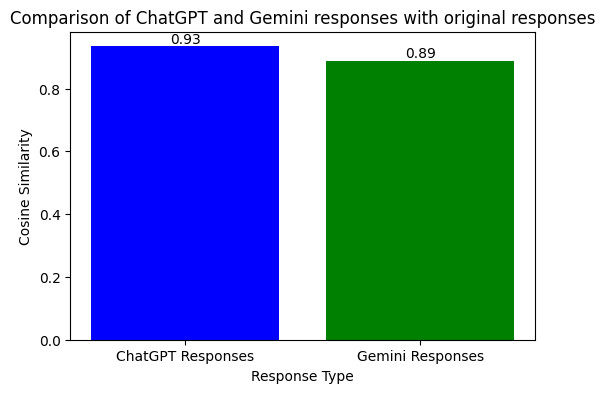

In [ ]:
# plotting graph for comparing  of chatgpt and gemini using cosine similarities

import matplotlib.pyplot as plt

# Prepare data
labels = ['ChatGPT Responses', 'Gemini Responses']
cosine_similarities = [mean_cosine_similarity_1, mean_cosine_similarity_2]

# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, cosine_similarities, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Response Type')
plt.ylabel('Cosine Similarity')
plt.title('Comparison of ChatGPT and Gemini responses with original responses')

# Add percentage labels to the bars
for bar, similarity in zip(bars, cosine_similarities):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{similarity:.2f}',
             ha='center', va='bottom')

# Show plot
plt.show()



Above plot shows that ChatGPT is performing better than Gemini.

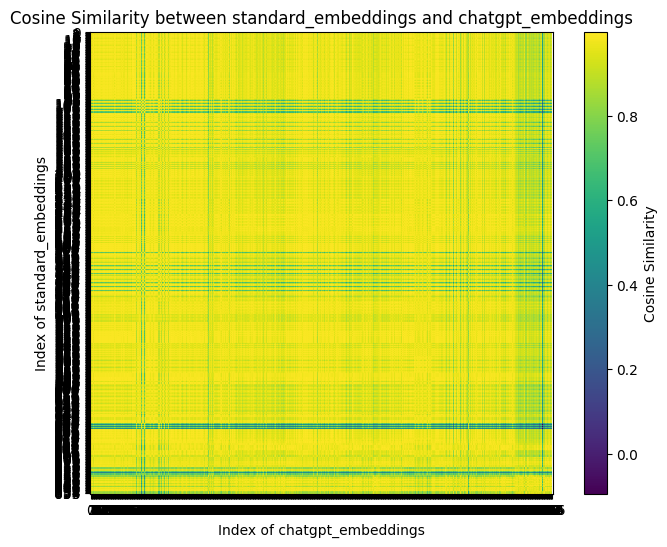

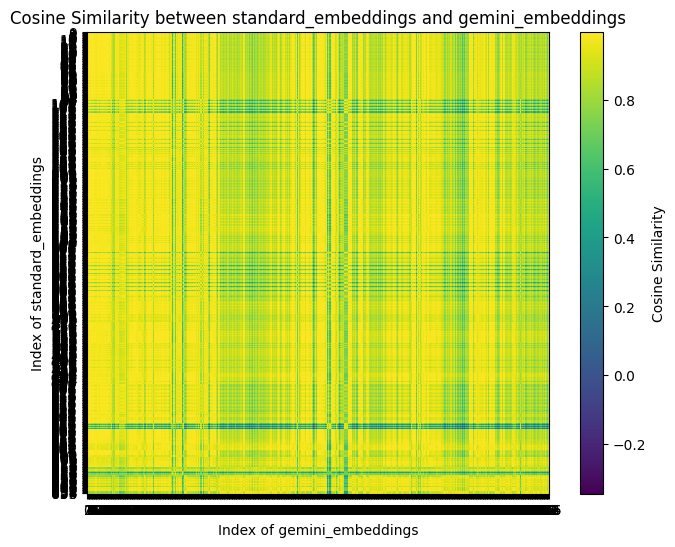

In [ ]:
#plotting charts to comare embeddings of orginal, gpt and gemini
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


# Calculate  cosine_similarity(standard_embeddings, chatgpt_embeddings)
cosine_sim_1 = cosine_similarity(standard_embeddings, chatgpt_embeddings)
# Plotting the cosine similarity
plt.figure(figsize=(8, 6))
plt.imshow(cosine_sim_1, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.xlabel('Index of chatgpt_embeddings')
plt.ylabel('Index of standard_embeddings')
plt.title('Cosine Similarity between standard_embeddings and chatgpt_embeddings')
plt.yticks(np.arange(len(standard_embeddings)), np.arange(len(standard_embeddings)))
plt.xticks(np.arange(len(chatgpt_embeddings)), np.arange(len(chatgpt_embeddings)))
plt.show()
# Calculate cosine similarity between each pair of points
cosine_sim_2 = cosine_similarity(standard_embeddings, gemini_embeddings)

# Plotting the cosine similarity
plt.figure(figsize=(8, 6))
plt.imshow(cosine_sim_2, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.xlabel('Index of gemini_embeddings')
plt.ylabel('Index of standard_embeddings')
plt.title('Cosine Similarity between standard_embeddings and gemini_embeddings')
plt.yticks(np.arange(len(standard_embeddings)), np.arange(len(standard_embeddings)))
plt.xticks(np.arange(len(gemini_embeddings)), np.arange(len(gemini_embeddings)))
plt.show()

The above first chart is plotted between Embeddings of original responses and ChatGPT responses where yellow color represents that similarity score is greater than 80

The above second chart is plotted between Embeddings of original responses and Gemini responses where most of the color is yellow which represents that similarity score is greater than 80

## 12. Finding optimal number of clusters for Original, ChatGPT and Gemini Embeddings and plotting scatter plot

In [ ]:
import warnings
warnings.filterwarnings('ignore')


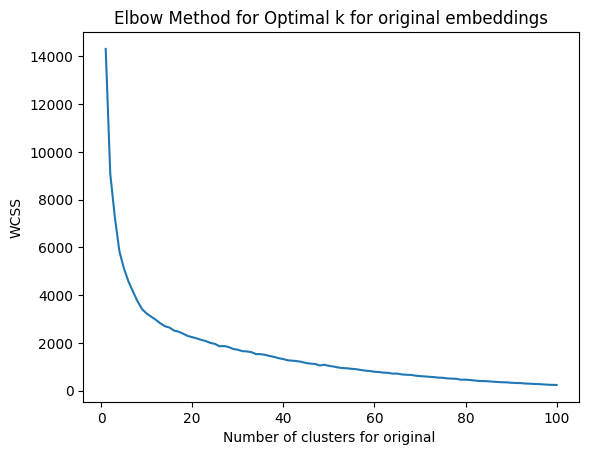

In [ ]:
#finding optimal number of clusters for original response embeddings using  elbow chart
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = standard_embeddings

wcss = []
for i in range(1, 101):  # Range from 1 to 50 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 101), wcss)
plt.xlabel('Number of clusters for original ')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k for original embeddings')
plt.show()



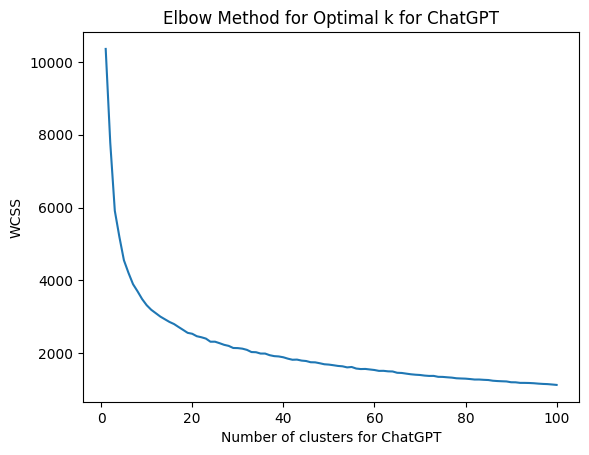

In [ ]:
#finding optimal number of clusters for chatgpt response embeddings using  elbow chart


wcss = []
for i in range(1, 101):  # Range from 1 to 50 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(chatgpt_embeddings)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 101), wcss)
plt.xlabel('Number of clusters for ChatGPT')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k for ChatGPT')
plt.show()



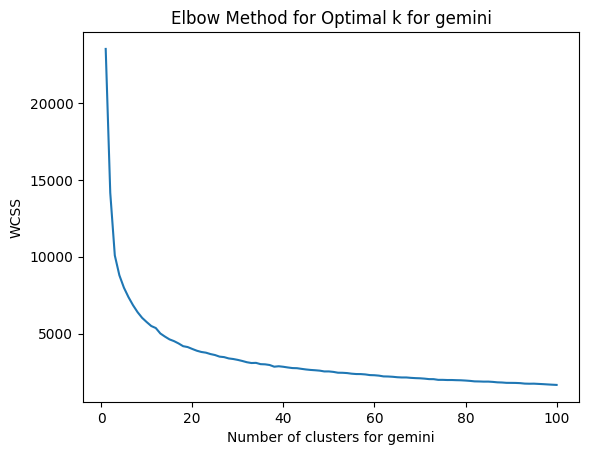

In [ ]:
#finding optimal number of clusters for gemini response embeddings using  elbow chart

wcss = []
for i in range(1, 101):  # Range from 1 to 50 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(gemini_embeddings)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 101), wcss)
plt.xlabel('Number of clusters for gemini')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k for gemini')
plt.show()



In [ ]:
print(len(standard_embeddings))

657


From the above elbow charts we can see that the line is getting straight at point 80 so we can take 80 as the optimal number of clusters

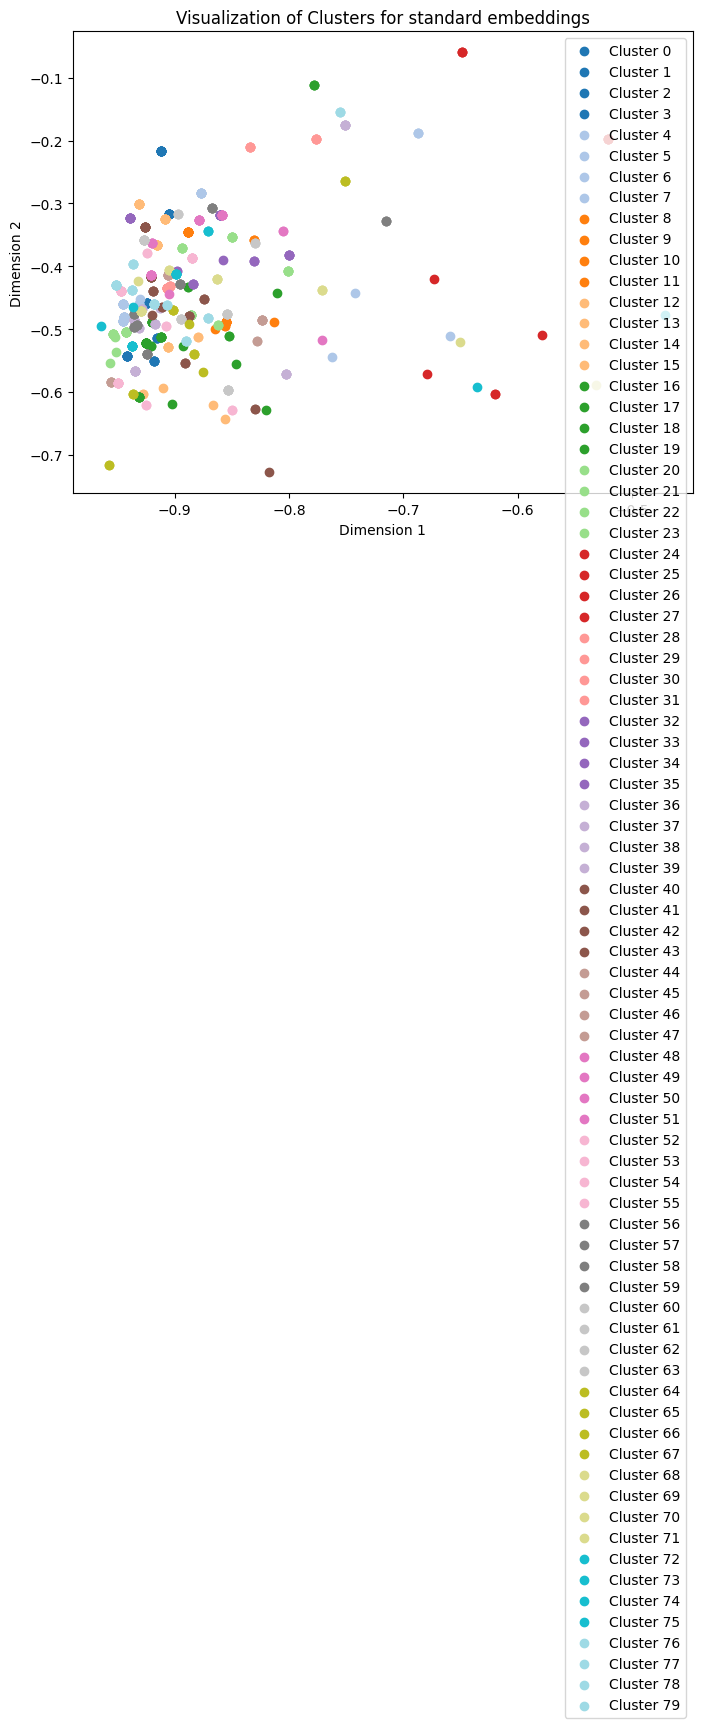

In [ ]:
#clustering  and scatterplot for standard embeddings

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Initialize K-means with desired number of clusters
kmeans = KMeans(n_clusters=80, random_state=42)

# Fit K-means to your embedding matrix
standard_cluster_labels = kmeans.fit_predict(standard_embeddings)

# Generate 80 distinct colors for clusters
colors = plt.cm.tab20(np.linspace(0, 1, 80))

# Create a dictionary mapping cluster labels to colors
color_dict = {cluster_label: color for cluster_label, color in zip(range(80), colors)}

# Plot the clusters using the first two dimensions of the embedding matrix
plt.figure(figsize=(8, 6))
for cluster_label in range(80):
    cluster_mask = standard_cluster_labels == cluster_label
    plt.scatter(standard_embeddings[cluster_mask, 0], standard_embeddings[cluster_mask, 1],
                c=[color_dict[cluster_label]], label=f'Cluster {cluster_label}')

plt.title('Visualization of Clusters for standard embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [ ]:
len(set((standard_cluster_labels)))
standard_cluster_labels

array([ 1,  7,  7, 21, 53,  1,  7,  7, 21, 53,  1,  7,  7, 21, 53,  1,  7,
        7, 21, 53,  1,  7,  7, 21, 53,  1,  7,  7, 21, 53,  1,  7,  7, 21,
       53,  1,  7,  7, 21, 53,  1,  7,  7, 21, 53,  1,  7,  7, 21, 53,  1,
        7,  7, 21, 53,  1,  7,  7, 21, 53, 21, 21, 21, 74, 74, 74,  0, 40,
       76, 74,  0, 40, 76, 74,  0, 40, 76, 74,  0, 40, 76, 74,  0, 40, 76,
       74,  0, 40, 76, 74,  0, 40, 76, 74,  0, 40, 76, 59, 29, 30, 57, 59,
       29, 30, 57, 59, 29, 30, 57, 59, 29, 30, 57, 59, 29, 30, 57,  7, 38,
       22, 69, 54, 52, 35, 38, 22, 69, 54, 52, 35, 38, 22, 69, 54, 52, 35,
       38, 22, 69, 54, 52, 35, 38, 22, 69, 54, 52, 35, 38, 22, 69, 54, 52,
       35, 38, 22, 69, 54, 52, 35, 38, 22, 69, 54, 52, 35, 67, 34, 63, 72,
       34, 63, 72, 34, 63, 72, 69, 39, 10, 69, 39, 10, 69, 39, 10, 48, 49,
       21, 48, 49, 21, 48, 49, 21, 48, 49, 21, 48, 49, 21, 48, 49, 21, 48,
       49, 21,  2, 79, 13, 13,  2, 79, 13, 13,  2, 79, 13, 13,  2, 79, 13,
       13,  2, 79, 13, 13

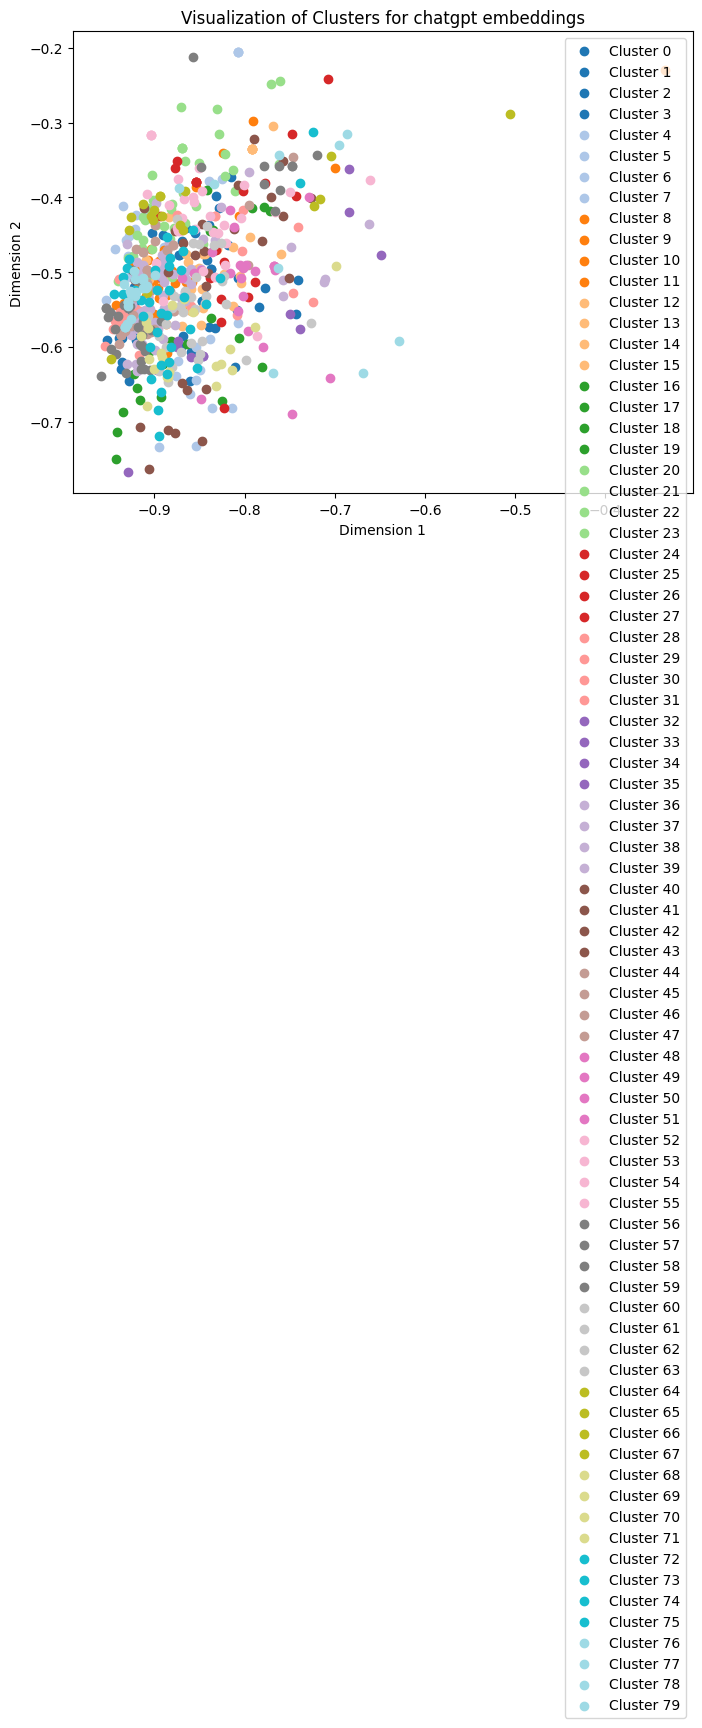

In [ ]:
#clustering  and scatterplot for chatgpt embeddings

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Initialize K-means with desired number of clusters
kmeans = KMeans(n_clusters=80, random_state=42)

# Fit K-means to your embedding matrix
chatgpt_cluster_labels = kmeans.fit_predict(chatgpt_embeddings)

# Generate 80 distinct colors for clusters
colors = plt.cm.tab20(np.linspace(0, 1, 80))

# Create a dictionary mapping cluster labels to colors
color_dict = {cluster_label: color for cluster_label, color in zip(range(80), colors)}

# Plot the clusters using the first two dimensions of the embedding matrix
plt.figure(figsize=(8, 6))
for cluster_label in range(80):
    cluster_mask = chatgpt_cluster_labels == cluster_label
    plt.scatter(chatgpt_embeddings[cluster_mask, 0], chatgpt_embeddings[cluster_mask, 1],
                c=[color_dict[cluster_label]], label=f'Cluster {cluster_label}')

plt.title('Visualization of Clusters for chatgpt embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [ ]:
len(set((chatgpt_cluster_labels)))
chatgpt_cluster_labels

array([79, 46,  2,  2, 66,  2, 46, 79,  2, 46,  2, 46, 79, 79, 46, 79,  2,
        2,  2, 31, 79, 46,  2,  2, 31, 79, 46, 79, 31, 31, 79, 46, 79,  2,
        0, 22, 79,  2,  2, 46, 31, 46, 79,  2, 55, 31, 46, 55,  2, 13,  2,
       46, 79, 36, 46,  2, 46, 79,  2,  2,  6,  6, 31, 74, 39,  4, 20,  0,
       39, 38, 14, 39, 53,  4, 14, 39, 21,  4, 14, 39, 39, 39, 14, 74,  0,
       39, 14, 74, 39, 27, 14,  0, 53, 39, 38,  0, 53, 20, 20, 59,  6, 20,
        0, 17, 66, 20,  0, 17, 66,  0, 74, 20, 63, 37,  0,  6,  6,  9, 79,
       63, 48, 45, 45, 31, 48, 52,  9, 66, 66, 45, 48, 28, 48, 45, 45, 45,
       48,  1, 79, 31, 31, 66, 48, 36, 31, 31, 45, 45, 48, 28, 48, 66, 45,
       45, 48, 38, 22, 45, 66, 45, 48, 63, 54, 45, 31, 45, 11, 59, 47, 29,
       59, 36, 29, 44, 47, 29,  9,  2, 63,  1, 31, 63,  9,  2, 46,  0,  8,
       27,  9, 62, 63,  9, 62, 31,  9,  1, 27, 13, 73,  6, 28, 12, 79, 37,
       62,  9, 33, 54, 26,  9, 42, 54, 26, 52, 72, 62, 49, 79, 12, 72, 52,
       63, 12, 33, 33,  2

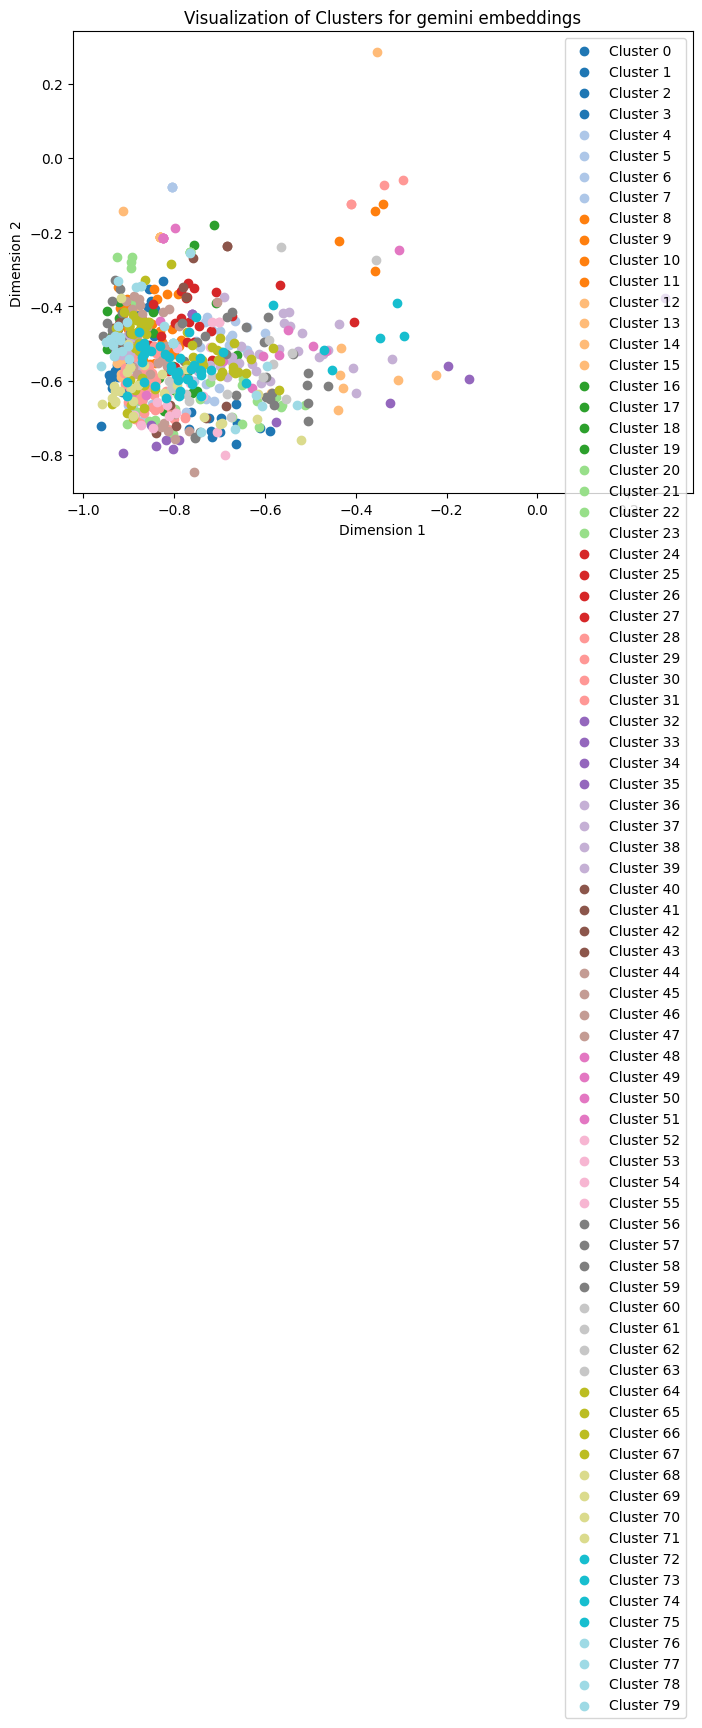

In [ ]:
#clustering  and scatterplot for gemini embeddings



from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Initialize K-means with desired number of clusters
kmeans = KMeans(n_clusters=80, random_state=42)

# Fit K-means to your embedding matrix
gemini_cluster_labels = kmeans.fit_predict(gemini_embeddings)

# Generate 80 distinct colors for clusters
colors = plt.cm.tab20(np.linspace(0, 1, 80))

# Create a dictionary mapping cluster labels to colors
color_dict = {cluster_label: color for cluster_label, color in zip(range(80), colors)}

# Plot the clusters using the first two dimensions of the embedding matrix
plt.figure(figsize=(8, 6))
for cluster_label in range(80):
    cluster_mask = gemini_cluster_labels == cluster_label
    plt.scatter(gemini_embeddings[cluster_mask, 0], gemini_embeddings[cluster_mask, 1],
                c=[color_dict[cluster_label]], label=f'Cluster {cluster_label}')

plt.title('Visualization of Clusters for gemini embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In the above plots 80 clusters and 661 data points were plotted with 80 different colors and we can see that the clusters are overlapping it means that datapoints belongs to more than one clusters

In [ ]:
len(set((gemini_cluster_labels)))
gemini_cluster_labels

array([ 8,  8,  8,  8,  8,  8, 18, 18,  8,  8, 76,  8, 64, 24, 56,  8,  8,
       38,  8,  8,  8, 18,  8,  8,  8,  9, 18,  8, 18, 18, 18, 18,  8, 18,
       78, 11, 11, 31, 11, 11, 25, 25, 25, 25, 71, 18, 21, 21, 21, 21, 78,
       78, 25, 78, 25, 31, 31, 41, 31, 41, 72, 76, 76,  2,  2, 43, 43, 43,
       43, 43,  3, 47,  3, 72, 30, 70, 72, 71, 71, 71, 25,  6, 21, 32,  8,
       47, 43, 72, 43,  2, 43, 70, 43, 72, 14, 72, 45,  2,  2, 38, 76, 76,
       76, 38, 76, 29, 29, 38, 64,  2, 29, 72, 72,  2, 64, 29, 64, 19, 44,
       40, 34, 17, 44, 34, 52, 40, 40, 44, 52, 44,  0,  5,  0, 44, 44, 17,
       57, 14, 57, 42, 48, 57, 66, 66, 66, 66, 79, 27, 66, 66, 66, 64, 66,
       24, 27,  0, 27, 66, 34, 66,  5, 14, 14, 36,  5, 14, 57,  0, 79, 79,
       79, 79, 42, 12, 13, 27, 27, 66, 38,  3, 18, 18,  8, 55, 51, 36, 38,
       18,  9, 37, 78, 19, 57, 57, 57, 59, 57, 65,  1, 69, 57, 28, 36, 48,
       65, 57, 73, 37, 60, 37, 14, 69, 73, 30,  6, 59, 65, 65, 73, 59, 30,
        6, 38,  9, 30, 37